<hr>

# Portrait of a lake's death

<i>by [Colas Droin](colasdroin.github.io) (EPFL), [Diana Zambellini](https://www.linkedin.com/in/diana-zambelloni-0b346b155/en/?originalSubdomain=it) (EPFL), and [Carlos Vivar Rios](h4ck1ng.science) (h4cking.science).</i>

Project developed for the Jupyter Notebook Competition by [Wekeo](https://notebook.wekeo.eu/). MIT License 2022.
<hr>


## Abstract

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

<hr>

## Notebook outline

* [1 - Introduction](#introduction)
* [2 - Analysis](#Analysis)
    * [2.1 - Products selection and downloading](#products_selection)
    * [2.2 - Products preprocessing](#products_preprocessing)
    * [2.3 - Lake segmentation](#lake_segmentation)
    * [2.4 - Lake dynamics](#lake_dynamics)
* [3 - Conclusions](#conclusions)



<hr>

## <a id='introduction'></a>1. Introduction

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

<hr>

## <a id='analysis'></a> 2. Analysis

The first step is to inspect a Sentinel-2 image file, in order to better understand the file structure. Sentinel-2 carries a single `Multi-spectral Instrument (MSI)`, which provides 13 bands in the `visible`, `near-infrared` and `shortwave-infrared` spectrum with different ground resolutions:

|#|Name|Spatial Resolution|
|------------|----------------|-----------------|
|B1|Coastal aerosol|60|
|B2|Blue|10|
|B3|Green|10|
|B4|Red|10|
|B5|Red Edge 1|20|
|B6|Red Edge 2|20|
|B7|Red Edge 3|20|
|B8|Near-Infrared|10|
|B8a|Near-Infrared narrow|20|
|B9|Water vapor|60|
|B10|Shortwave-Infrared cirrus|60|
|B11|Shortwave Infrared 1|20|
|B12|Shortwave-Infrared 2|20|

<hr>

## Dependencies installation

In [1]:
# !pip install matplotlib
# !pip install ipywidgets
# !pip install umap-learn
# !pip install opencv-python
# !pip install imutils
# !pip install seaborn
# !pip install calmap

<hr>

### Products selection and downloading

Footprint selection using [Openstreetmaps WTK playground](https://clydedacruz.github.io/openstreetmap-wkt-playground/)

![](assets/wtk_prev.png)

```
POLYGON((-70.9649357878204 -33.81244707234685,-70.96591676385808 -33.89260670554516,-70.84251675089554 -33.89488656955273,-70.84506715448308 -33.81375110356652,-70.9649357878204 -33.81244707234685))
```

Selection of a time range starting on 2016 until 2022.


Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [2]:
#%run "./technical_notebooks/000_data_downloading.ipynb"

In [3]:
%%time
# Alternative you can download the dataset from OSF. Each zip files requires aproximately 1GB. 
import requests
import numpy as np
import zipfile
import os

ixs = ['vek4x', 'hq2v6', 'zt9m3', 'qc35s', 'pa57c', 'gqxeu', 'cq4wr']
for year, ix in zip(np.arange(2016,2023), ixs):
    r = requests.get("https://osf.io/download/{}".format(ix))
    with open('data/{}.zip'.format(year), "wb") as fid:
        fid.write(r.content)

for year in np.arange(2016,2023):
    filepath = 'data/{}.zip'.format(year)
    with zipfile.ZipFile(filepath,"r") as zip_ref:
        zip_ref.extractall("data")
        
    os.remove(filepath)

CPU times: user 56.5 s, sys: 14 s, total: 1min 10s
Wall time: 2min 54s


In [4]:
## View dataproducts using folium?

<hr>

### Products preprocessing

In [6]:
%%time
%run "./technical_notebooks/001_data_preprocessing.ipynb" # 5 min

CPU times: user 1min 2s, sys: 23 s, total: 1min 25s
Wall time: 2min 27s


In this table we can see all the metadata obtained from the downloaded products.

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [7]:
display_table_summary()

,datatakesensingstart,beginposition,endposition,ingestiondate,processinglevel,platformname,size,year
411c4c16-ed88-42af-a8e2-9a1414af3a62,2016-01-05 14:37:32.029,2016-01-05 14:37:32.029,2016-01-05 14:37:32.029,2018-12-18 19:07:14.311,Level-1C,Sentinel-2,635.49 MB,2016
4baae820-6e86-4301-9c4c-590311459b04,2016-01-22 14:29:42.030,2016-01-22 14:29:42.030,2016-01-22 14:29:42.030,2018-12-14 16:58:06.033,Level-1C,Sentinel-2,378.96 MB,2016
9aa597a5-e1cc-45af-97df-655f12eeabe5,2016-02-04 14:37:22.029,2016-02-04 14:37:22.029,2016-02-04 14:37:22.029,2018-12-07 19:45:55.926,Level-1C,Sentinel-2,811.35 MB,2016
4e3062c2-018c-49a5-8037-b7b9b9eaf407,2016-02-11 14:42:12.029,2016-02-11 14:42:12.029,2016-02-11 14:42:12.029,2018-12-08 12:46:18.299,Level-1C,Sentinel-2,301.32 MB,2016
feeab6d4-6768-4da7-a0e2-d9ca3d856c20,2016-03-02 14:42:02.030,2016-03-02 14:42:02.030,2016-03-02 14:42:02.030,2018-12-06 04:22:04.990,Level-1C,Sentinel-2,288.34 MB,2016
...,...,...,...,...,...,...,...,...
4093f883-6257-4827-9b8e-64d6a13d58e1,2022-05-23 14:37:31.024,2022-05-23 14:37:31.024,2022-05-23 14:37:31.024,2022-05-23 22:24:32.282,Level-1C,Sentinel-2,645.87 MB,2022
884fff44-99f2-4bd5-a571-6fe53ccb3d15,2022-05-28 14:37:29.024,2022-05-28 14:37:29.024,2022-05-28 14:37:29.024,2022-05-28 19:54:16.107,Level-1C,Sentinel-2,633.39 MB,2022
b31187b3-349f-4988-96ed-305692e738a8,2022-06-02 14:37:41.024,2022-06-02 14:37:41.024,2022-06-02 14:37:41.024,2022-06-02 23:14:05.200,Level-1C,Sentinel-2,799.76 MB,2022
9cb65394-097c-40c0-bee0-1eb2849acb67,2022-06-07 14:37:29.024,2022-06-07 14:37:29.024,2022-06-07 14:37:29.024,2022-06-07 19:38:38.627,Level-1C,Sentinel-2,739.14 MB,2022


We can see the temporal distribution.

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

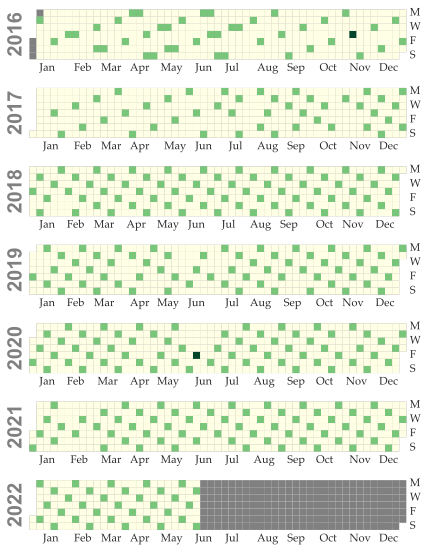

In [8]:
calendar_all_products()

Using `ipywidgets` we can visualize all the snapshot acquired in an interactive way (unfortunately, this doesn't work when exporting the notebook to HTML). Using the _index_ slider, one can select the corresponding image, and same with the _Channel_ slider. If the box _Display RGB_ is ticked, the _Channel_ slider is ignored, as the (normalized) red, green, and blue channels are automatically used to build the corresponding RGB image.

If you play a but with the widget, you will notice that many images are covered by clouds, or are completely black or white for unknown reasons. The next step in our pipeline is thus **data filtering** to remove these uninterpretable images.

In [9]:
visualize_all_products()

Output()

To filter the images that are not segmentable, or hardly readable, we simply plot the average image value distribution, across all channels. The reasonning is that interpretable images make up the majority of the dataset, and that they should have a more or less similar distribution of values across all dates. Images that are all black, or full of clouds, will appear as outliers.

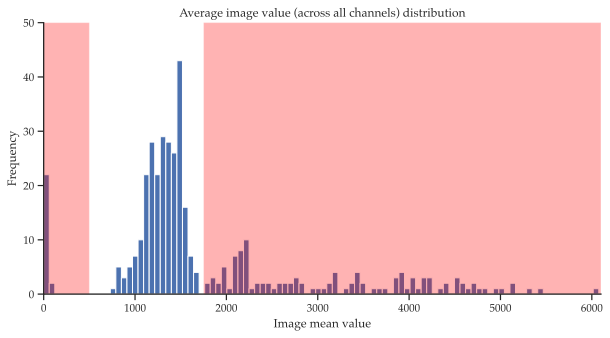

In [10]:
plot_average_image_value()

It seems that we obtain an almost Gaussian distribution of values centered on ~$1200$, with a standard deviation of around ~$500$, and then many other images with very low or very high values. After checking that the vast majority of good images are in the range of $[500, 1750]$, and, conversely, almost all images outside of this range are not desirable, we use these values as lower and upper thresholds. All images not in this range are discarded. 

We then plot again the calendar of image acquisition, and it seems that we still have a relatively well sampled time span, although not perfect.

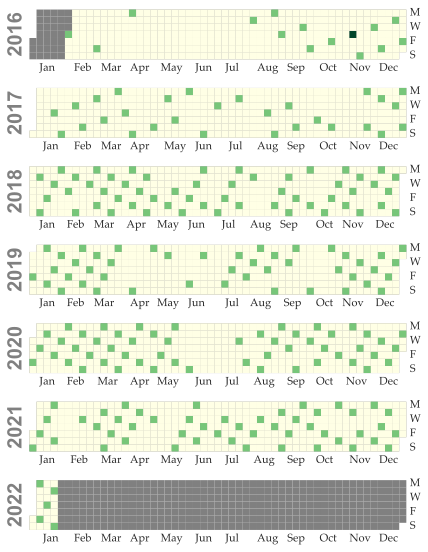

In [11]:
calendar_selected_products()

In parallel, we can visualize the final set of selected images. It appears that some images are still a bit cloudy but, overall, the dataset looks ready for trying to segment the lake.

In [12]:
visualize_selected_products()

Output()

<hr>

### Lake segmentation

In [14]:
%run "./technical_notebooks/002_data_segmentation.ipynb"

In order to segment the lake we use some _active contour modelling_ method, and precisely, the _Chan-Vese Segmentation_ algorithm. Without getting too much into details, this algorithm works well to find out the contours of closed complex shapes, preferentiably star-convex. This is the case of the lake, and it seems to yield better results than alternative methods such as the _Morphological Geodesic Active Contours_. Alternatively, we tried, without success, classifying the pixels with _random forests_, or clustering them with _K-means_ once projected in a low-dimensional space with e.g. _UMAP_ or _t-SNE_. We use channel B10 for segmentation, as, surprisingly, it seems to be the one yielding the best results.

One issue that we encountered is that the algorithm tends to find _several_ closed convex shapes to segment in the image. And when the lake is small, it's hard to tell, in an unsupervised one, which is the correct one. And sometimes, several ones are correct, as when the lake is close to getting dry, it tends to separate into small ponds. 

The first trick we apply is to simply filter out the segments whose area are less than 20% of the area of the cleanest segment we can find in the same image. It's a simple way to remove the small segments, and it seems to work well. Overall, some problematic segments still remain.

Another simple trick is simply to look at the segment in which the lake is the fullest, and discard all segments in other images that do not pertain to the area covered by this biggest segment. 

Finally, the last trick we apply is to find out what the intensity value of a pixel belonging to the lake should be, by looking at one of the cleanest segments, which we known is correct, and then compare the intensity value of the pixels belonging to other segments, to this reference value. With channel B10, the lake appears as very dark. We thus look at segments whose average value is way above the reference value, and we discard them. The difficulty is that, when the lake gets dry, it tends to get invaded by algae, whose intensity is way higher. Yet we don't want to discard these segments, as they correspond to dirty water, but still water... By trial and error, we find that a threshold of ~$1500$ works well, preserving even the segments in which the lake is full of algae. 

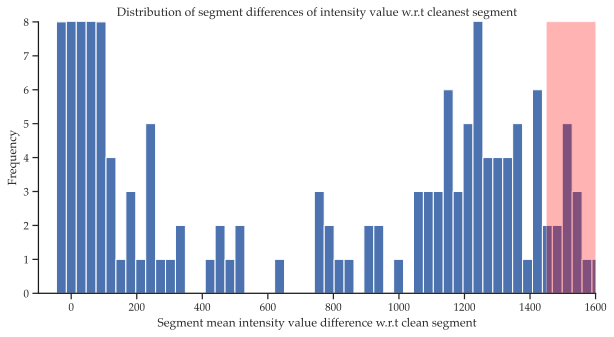

In [15]:
plot_segment_differences()

We can now plot what appears to be an excellent set of segmented images, altough everything is still not perfect.

In [16]:
visualize_segmentation()

Output()

<hr>

### Lake Dynamics

In [20]:
%run "./technical_notebooks/003_time_series_analysis.ipynb"

By calculating the total area of the lake we can study how it changes over time. To get a better idea of the dynamics, we also plot a smoothed version of the signal, which we first resample to get a regular time series, and smooth with a Savitzky-Golay filter. We obtain the figure below.

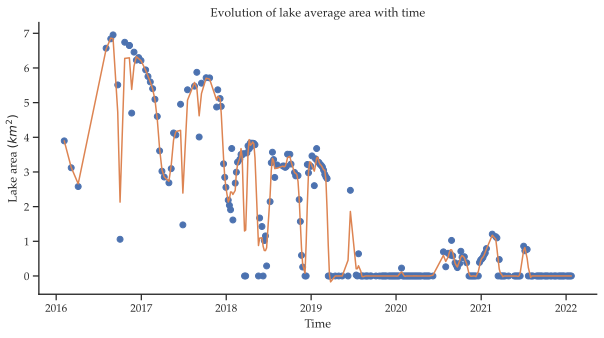

In [21]:
plot_evolution_lake_average()

It seems that some outliers still persist. Whether these outliers are due to bad segmentation, or bad images is not relevant anymore at this point, as we tried everything to keep only clean data. So we now want to discard the points that do not follow the same trend as the rest of the data, which, according to the images of the segmentation, seems to behave properly. Accordingly, we plot the compare the area from the segments with the area from the smoothed signal, and discard the segments/images that do not behave as we expect. The formula, based on relative least squares, is as follow:

$$E_i = \frac{(A_{e,i} - A_{s,i})^2}{A_{s,i}}$$ 

Where $E_i$ is the relative error of the area of segment $i$, and $A_{e,i}$ is the expected area of the segment $i$ (from the smoothed data), and $A_{s,i}$ is the area of the segment $i$ from the segmentation.

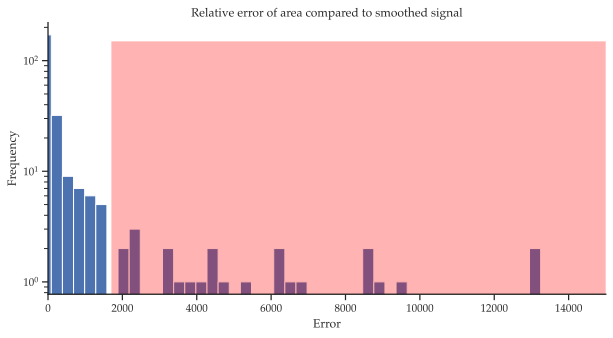

In [22]:
plot_relative_error_area()

We can now smooth a bit more the data (still using a Savitzky-Golay filter), and plot the area of the lake as a function of time with a nicer representation.

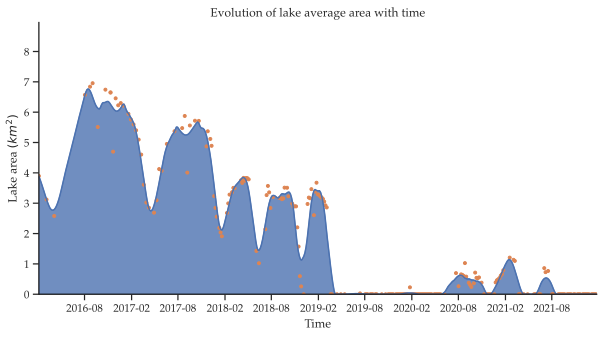

In [23]:
plot_evolution_lake_average_time()

Using channel B7, we get a proxy for the algae concentration in the lake.

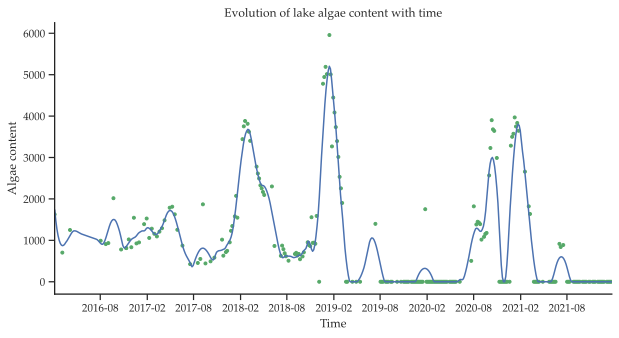

In [24]:
plot_evolution_lake_algae()

We can now merge the two plots, and it appears that the algae concentration is quite related to the area of the lake.

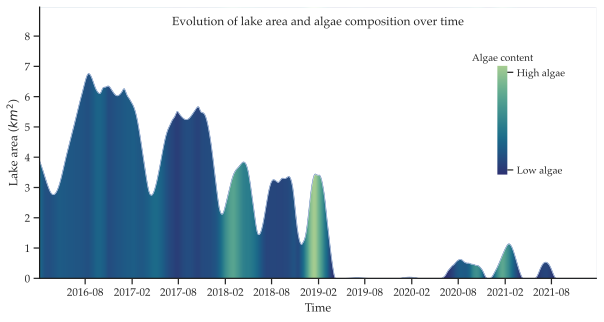

In [25]:
plot_evolution_area_algae()

<hr>

## Conclusion

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

<hr>

<i><b>Portrait of a lake's death</b> by [Colas Droin](colasdroin.github.io) (EPFL), [Diana Zambellini](https://www.linkedin.com/in/diana-zambelloni-0b346b155/en/?originalSubdomain=it) (EPFL), and [Carlos Vivar Rios](h4ck1ng.science) (h4cking.science).</i>

Project developed for the Jupyter Notebook Competition by [Wekeo](https://notebook.wekeo.eu/). MIT License 2022.
